<a href="https://colab.research.google.com/github/Nore-gibhub/Challenge_Alura_Store/blob/main/Challenge_Alura_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de facturación por tienda para la cadena Alura Store.**

##**Carga de Data**

In [353]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


##**Generación De Data Frame**

In [354]:
#Combinar tablas

tienda['tiendas']='tienda1'
tienda2['tiendas']='tienda2'
tienda3['tiendas']='tienda3'
tienda4['tiendas']='tienda4'

#Agrupar y Sumar

df_total = pd.concat([tienda,tienda2,tienda3,tienda4])
df_total.sample(5)



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tiendas
2227,Bloques de construcción,Juguetes,35800.0,2300.0,15/02/2022,Beatriz Morales,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,tienda2
2085,Smartwatch,Electrónicos,129800.0,7300.0,05/06/2022,Santiago Silva,Cali,4,Tarjeta de crédito,4,3.43722,-76.52250,tienda4
1414,Mesa de comedor,Muebles,219600.0,16400.0,22/07/2020,Ángel Rodriguez,Cúcuta,3,Tarjeta de crédito,1,7.89391,-72.50782,tienda2
2121,Guitarra eléctrica,Instrumentos musicales,944500.0,48500.0,22/01/2022,Izabela de León,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda3
2170,Guitarra eléctrica,Instrumentos musicales,678000.0,42900.0,07/06/2022,Blanca Ramirez,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,tienda2


##**1. Ingreso Total Por Tienda**

####En este primer análisis, se calculará el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.


In [355]:
ingreso_por_tienda = df_total.groupby('tiendas')['Precio'].sum()
ingreso_formateado = ingreso_por_tienda.map('${:,.0f}'.format)

Porcentaje_de_ventas_por_tienda = (ingreso_por_tienda / ingreso_por_tienda.sum()) * 100
porcentaje_formateado = Porcentaje_de_ventas_por_tienda.map('{:.1f}%'.format)

print(ingreso_formateado)
print(' ')
print(porcentaje_formateado)


tiendas
tienda1    $1,150,880,400
tienda2    $1,116,343,500
tienda3    $1,098,019,600
tienda4    $1,038,375,700
Name: Precio, dtype: object
 
tiendas
tienda1    26.1%
tienda2    25.4%
tienda3    24.9%
tienda4    23.6%
Name: Precio, dtype: object


##**Gráfico: Ingreso Total Por Tienda**

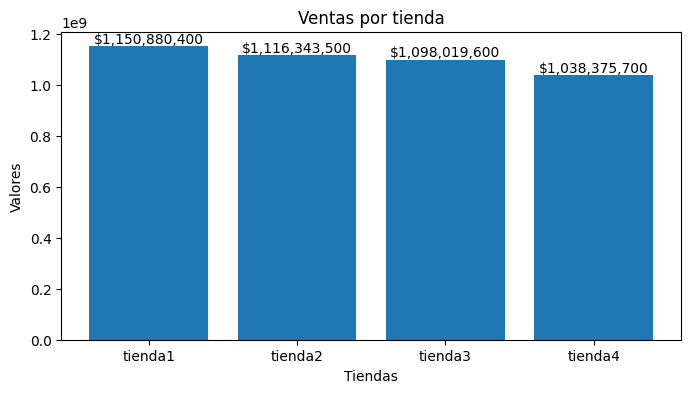

In [398]:
from matplotlib import pyplot as plt

x=ingreso_por_tienda.index
y=ingreso_por_tienda.values

plt.figure(figsize=(8,4))
plt.bar(x,y,width=0.8)

plt.xlabel('Tiendas')
plt.ylabel('Valores')
plt.title('Ventas por tienda')

for i, v in enumerate(y):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.show()

##**2. Ventas por categoría**

####Calcular la cantidad de productos vendidos por categoría en cada tienda. El objetivo es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.




In [357]:
#Cantidad de productos vendidos por cada categoría
ventas_por_tienda_cat = df_total.groupby(['tiendas', 'Categoría del Producto']).size().reset_index(name='Cantidad_Vendida')
ventas_ordenadas = ventas_por_tienda_cat.sort_values(by=['tiendas','Cantidad_Vendida'], ascending=[True,False])
print('Cantidad de productos vendidos por categoría en cada tienda')
print(ventas_ordenadas)
print(' ')

#Categorías mas polulares de cada tienda
idx_max = ventas_ordenadas.groupby('tiendas')['Cantidad_Vendida'].idxmax()
Cat_mas_vendidos_por_tienda = ventas_ordenadas.loc[idx_max]
print('Categorías más populares de cada tienda')
print(Cat_mas_vendidos_por_tienda)


Cantidad de productos vendidos por categoría en cada tienda
    tiendas   Categoría del Producto  Cantidad_Vendida
7   tienda1                  Muebles               465
3   tienda1             Electrónicos               448
5   tienda1                 Juguetes               324
2   tienda1        Electrodomésticos               312
1   tienda1     Deportes y diversión               284
4   tienda1   Instrumentos musicales               182
6   tienda1                   Libros               173
0   tienda1  Artículos para el hogar               171
15  tienda2                  Muebles               442
11  tienda2             Electrónicos               422
13  tienda2                 Juguetes               313
10  tienda2        Electrodomésticos               305
9   tienda2     Deportes y diversión               275
12  tienda2   Instrumentos musicales               224
14  tienda2                   Libros               197
8   tienda2  Artículos para el hogar               181
23  t

##**3. Valoración media por tienda**

####En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.



In [358]:
Calificacion_prom_por_tienda = df_total.groupby('tiendas')['Calificación'].mean()
Redondeado = round(Calificacion_prom_por_tienda,3)
print(Redondeado)

tiendas
tienda1    3.977
tienda2    4.037
tienda3    4.048
tienda4    3.996
Name: Calificación, dtype: float64


##**Gráfico: Valoración media por tienda**


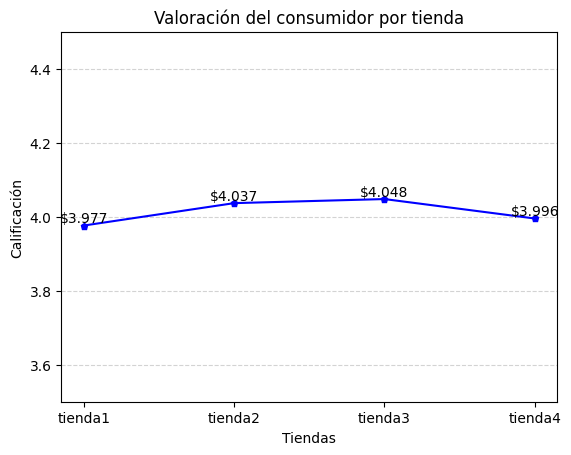

In [359]:
from matplotlib import pyplot as plt

x = Calificacion_prom_por_tienda.index
y = Calificacion_prom_por_tienda.values

plt.xlabel('Tiendas')
plt.ylabel('Calificación')
plt.title('Valoración del consumidor por tienda')

plt.ylim(ymin=3.5, ymax=4.5)

plt.grid(color="lightgray",linestyle="--", axis="y")
plt.plot(x,y, marker='p', markersize=5, color='blue' )


for i, v in enumerate(y):
    plt.text(i, v, f'${v:,.3f}', ha='center', va='bottom')

plt.show()

##**4. Productos más vendidos y menos vendidos**

####En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [360]:
ventas_por_tienda_producto = df_total.groupby(['tiendas', 'Producto']).size().reset_index(name='Cantidad_Vendida')

# Encuentra el producto más vendido para cada tienda
idx_max = ventas_por_tienda_producto.groupby('tiendas')['Cantidad_Vendida'].idxmax()
productos_mas_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_max]
print("Productos más vendidos por tienda:")
print(productos_mas_vendidos_por_tienda)
print(' ')

# Encuentra el producto menos vendido para cada tienda
idx_min = ventas_por_tienda_producto.groupby('tiendas')['Cantidad_Vendida'].idxmin()
productos_menos_vendidos_por_tienda = ventas_por_tienda_producto.loc[idx_min]
print("Productos menos vendidos por tienda:")
print(productos_menos_vendidos_por_tienda)

Productos más vendidos por tienda:
     tiendas                   Producto  Cantidad_Vendida
1    tienda1                    Armario                60
75   tienda2  Iniciando en programación                65
129  tienda3              Kit de bancas                57
163  tienda4                   Cama box                62
 
Productos menos vendidos por tienda:
     tiendas                   Producto  Cantidad_Vendida
4    tienda1  Auriculares con micrófono                33
77   tienda2              Juego de mesa                32
111  tienda3    Bloques de construcción                35
175  tienda4         Guitarra eléctrica                33


##**5. Valor Promedio De Envió Por tienda**

####En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [361]:
Cost_prom_de_envio = df_total.groupby('tiendas')['Costo de envío'].mean()
print(Cost_prom_de_envio)

tiendas
tienda1    26018.609580
tienda2    25216.235693
tienda3    24805.680373
tienda4    23459.457167
Name: Costo de envío, dtype: float64


##**Gráfico: Valor Promedio De Envió Por tienda**

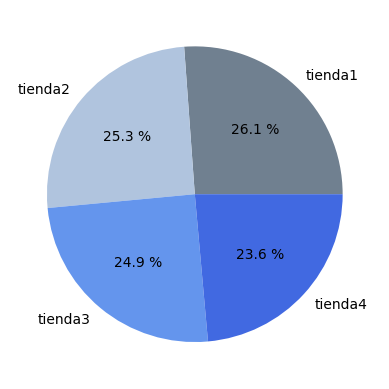

In [362]:
from matplotlib import pyplot as plt

A = Cost_prom_de_envio.index
B = Cost_prom_de_envio.values
c = ['slategrey','lightsteelblue','cornflowerblue','royalblue']

plt.pie(B, labels=A, colors=c, autopct="%0.1f %%")
plt.show()

##**Última Fecha de compra por tienda**

tiendas
tienda1   2023-03-31
tienda2   2023-03-31
tienda3   2023-03-31
tienda4   2023-03-30
Name: Fecha de Compra, dtype: datetime64[ns]
 


/tmp/ipython-input-3867899325.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])


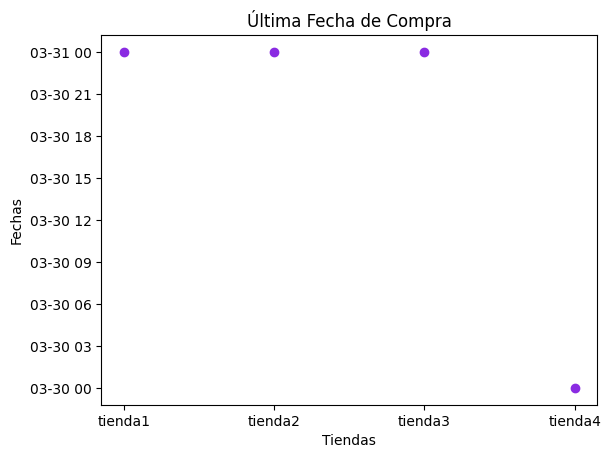

In [363]:
df_total['Fecha de Compra'] = pd.to_datetime(df_total['Fecha de Compra'])
ultima_venta_por_tienda = df_total.groupby('tiendas')['Fecha de Compra'].max()
print(ultima_venta_por_tienda)
print(' ')

from matplotlib import pyplot as plt
x = ultima_venta_por_tienda.index
y = ultima_venta_por_tienda.values
fig, ax = plt.subplots()

ax.scatter(x, y, color='blueviolet')
ax.set_xlabel('Tiendas')
ax.set_ylabel('Fechas')
plt.title('Última Fecha de Compra')

plt.show()

##**Análisis de geolocalización**

### Este análisis busca explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras.

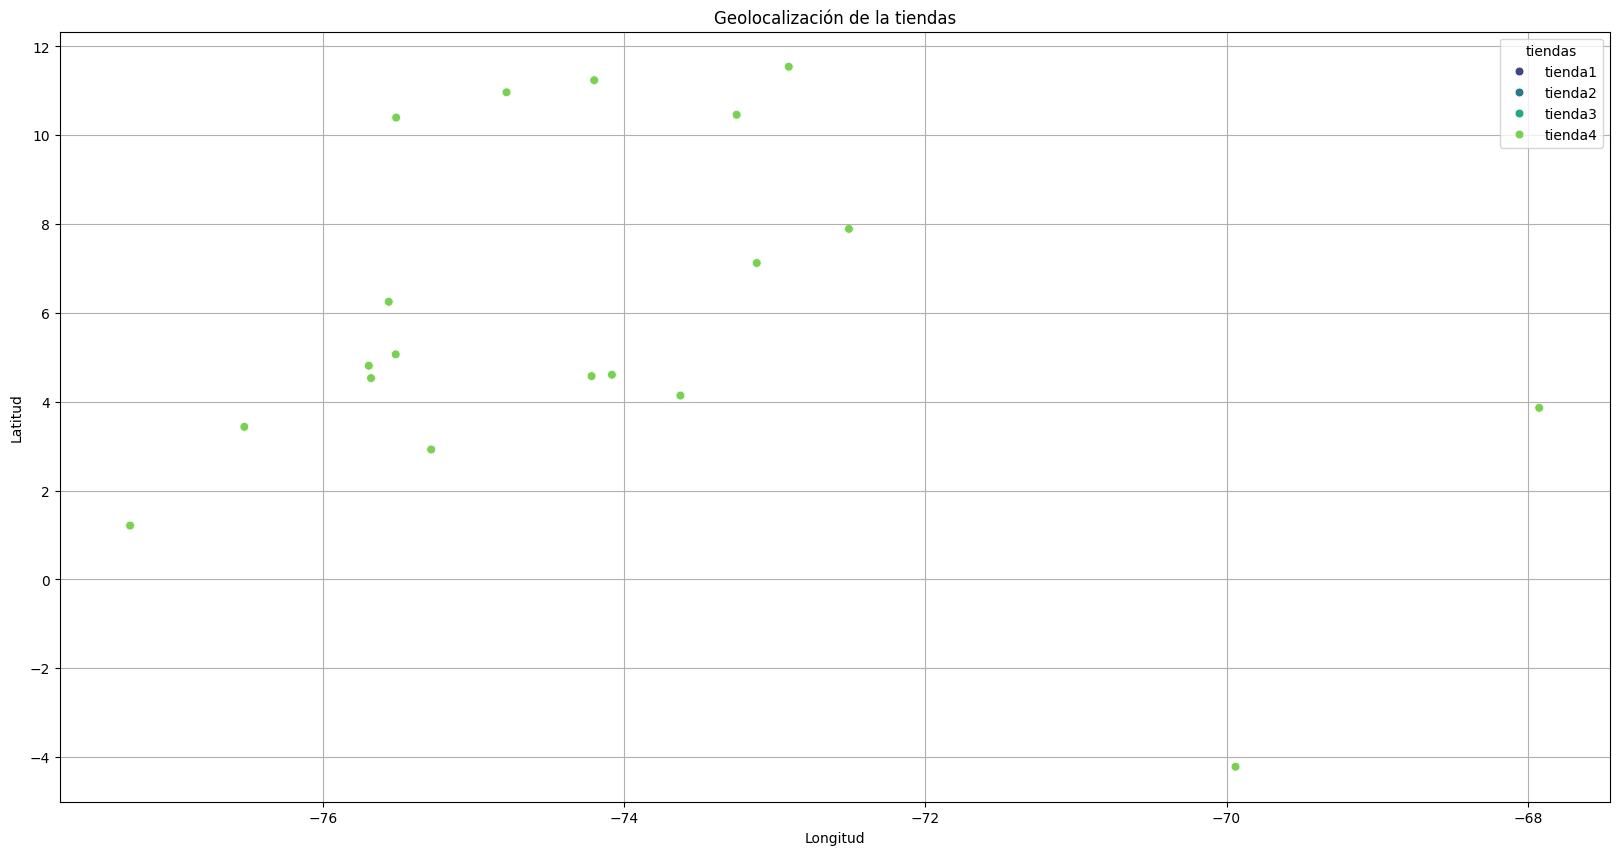

Rendimiento Por Tienda
tiendas
tienda1    $1,150,854,381
tienda2    $1,116,318,284
tienda3    $1,097,994,794
tienda4    $1,038,352,241
dtype: object
 


In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

#Localiación
plt.figure(figsize=(20,10))
sns.scatterplot(x='lon', y='lat', data=df_total, hue='tiendas', palette='viridis',s=40)

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Geolocalización de la tiendas')
plt.legend(title='tiendas',loc='upper right')
plt.grid(True)
plt.show()

#Rendimiento
Rendimiento = ingreso_por_tienda - Cost_prom_de_envio
Rendimiento_formateado = Rendimiento.map('${:,.0f}'.format)
print ('Rendimiento Por Tienda')
print (Rendimiento_formateado)
print (' ')

#**INFORME DE RESULTADOS**


##**Análisis de facturación por tienda para la cadena Alura Store**


Estimado Sr. Juan,


Luego de un análisis exhaustivo de los datos de las 4 tiendas de la cadena Alura Store, con el objetivo de poder realizar una recomendación sobre la tienda que debería vender, donde se analizaron variables como:


*   Ingresos totales por tienda.
*   Categorías de Productos más y menos vendidas.
*   Calificacione promedios de los clientes por tienda.
*   Productos más y menos vendidos.
*   Coste de envío promedio para cada tienda.


Se detalla lo siguiente:


1. Se analizaron los ingresos totales de la cadena, siendo la tienda que aportó menos ingresos la **tienda 4** cuyas ventas fueron un **23,6% del total**, mientras se mantiene en el 1er lugar de ventas la **tienda 1** con un **26,1%**, seguido por las tiendas 2 y 3 con un 25,4% y 24,9% respectivamente.En el siguiente gráfico se detallan los montos totales de ventas de cada tienda:

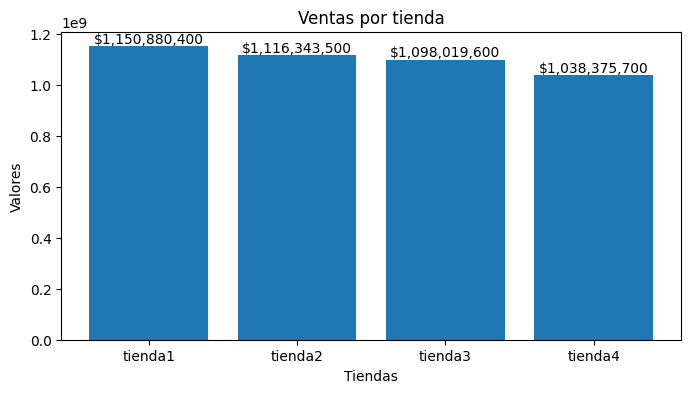

2. Se evaluó la calificación de los consumidores para conocer su opinión sobre las tiendas, siendo las tiendas muy similares en valoración, sin embargo, las calificaciones posicionan las tiendas de la siguiente manera de la peor a la mejor valorada:
Tienda1(3.97pts), Tienda4(3.99pts),Tienda2(4.03ptspts), Tienda3(4.04pts). Resaltando que la **Tienda4** esta entre las menos valoradas por los consumidores.

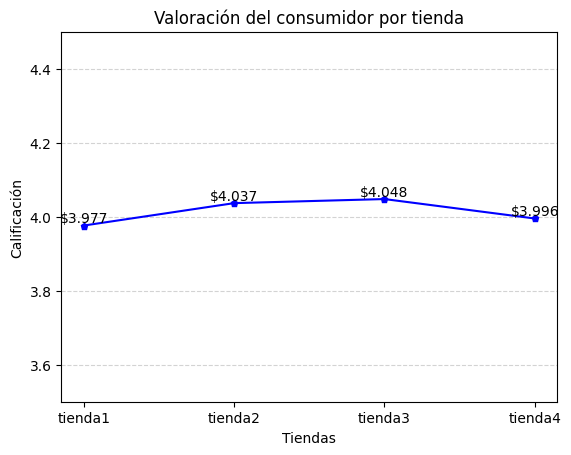

3. En cuanto a Categorías más vendidas para todas las tiendas destaca **la categoría muebles** siendo la **Tienda3** la que concentra las mayores ventas en esta categoría, mientras que en cuanto a los productos más vendido varian decuardo a la tienda, para la tienda con mayores ingresos **Tienda 1** el producto mas vendido son **los Armarios**, mientras que para la **tienda 3** son los **Kit de bancas**.

3. En cuanto a costos de envío aún cuando la **Tienda4** es la que mantiene los costos de envíos más bajos, no es la mejor calificada y ni la que representa las mayores ventas, lo que puede estar asociado a una oportunidad relacionada a la calidad y tiempo de envío.

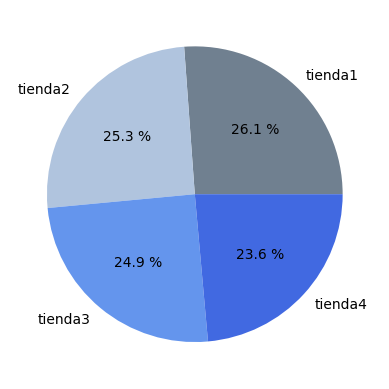

###**Conclusión y Recomendación:**
Teniendo en cuenta los resultados presentados anteriormente se recomienda vender la **Tienda4**, ya que es la que presenta las menores ventas según el período evaluado, la calificación del consumidor la situa entre una de las menos valoradas y llegó a registrar 0 ventas en almenos un día lo que impacta significativamente en los ingresos de la cadena.